In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("./data/Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### Check the overall details about the dataframe

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


#### Check the statistics of numerical variable

In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


#### Check whether there are missing values in dataset

In [6]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

#### Check whether there are duplicate instances in dataframe

In [7]:
df.loc[df.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [8]:
df_copy = df.copy()
df_copy.loc[len(df)] = df.loc[len(df) - 1]

In [9]:
df_copy.loc[df_copy.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
545,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [10]:
df_copy.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished
545,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


#### Exploratory Data Analysis (EDA)

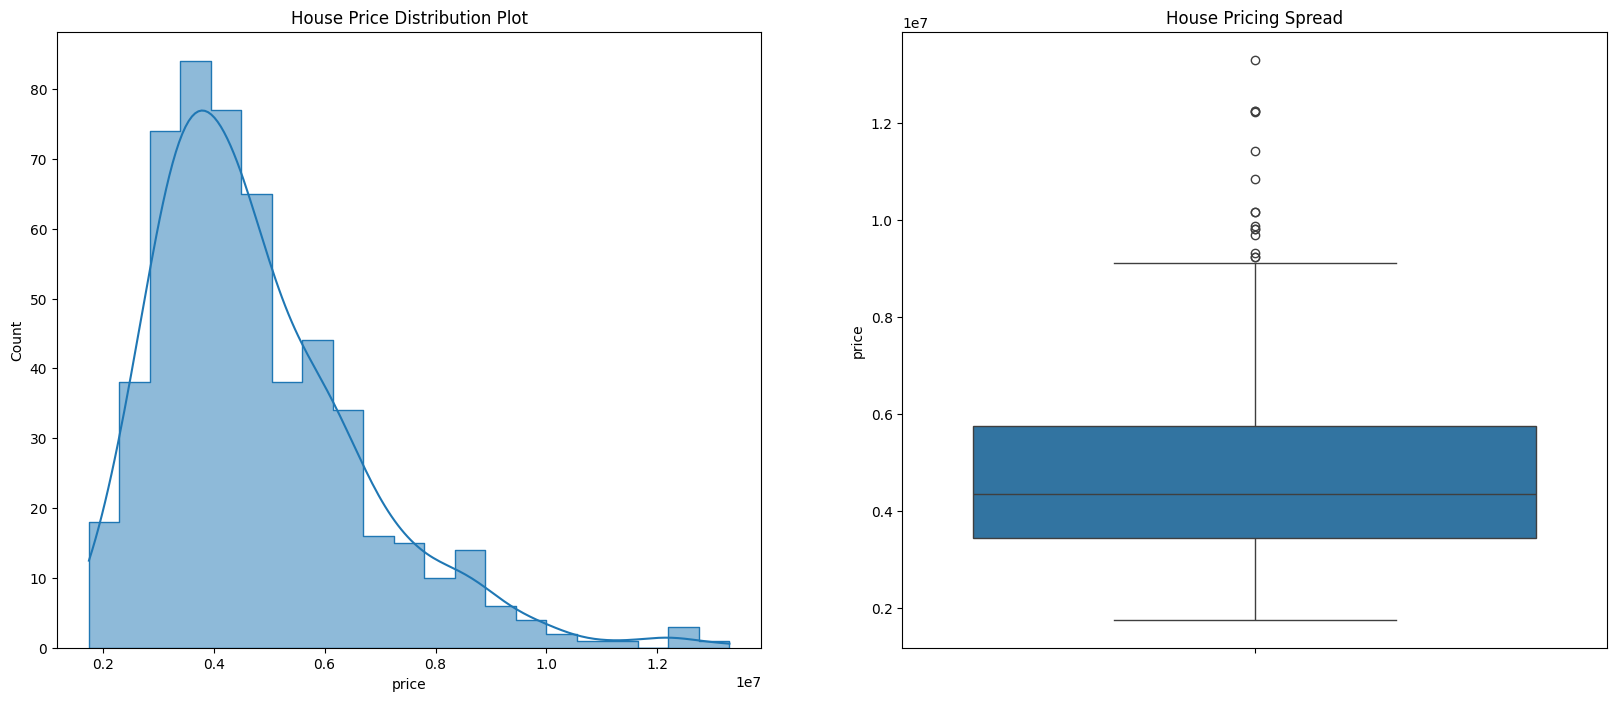

In [11]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.histplot(df.price, kde=True, element='step')

plt.subplot(1,2,2)
sns.boxplot(df.price)
plt.title('House Pricing Spread')

plt.show()

##### Visualizing Categorical Variable

In [12]:
categorical_features = [x for x in df.columns if df[x].dtype =='object']

In [13]:
categorical_features

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

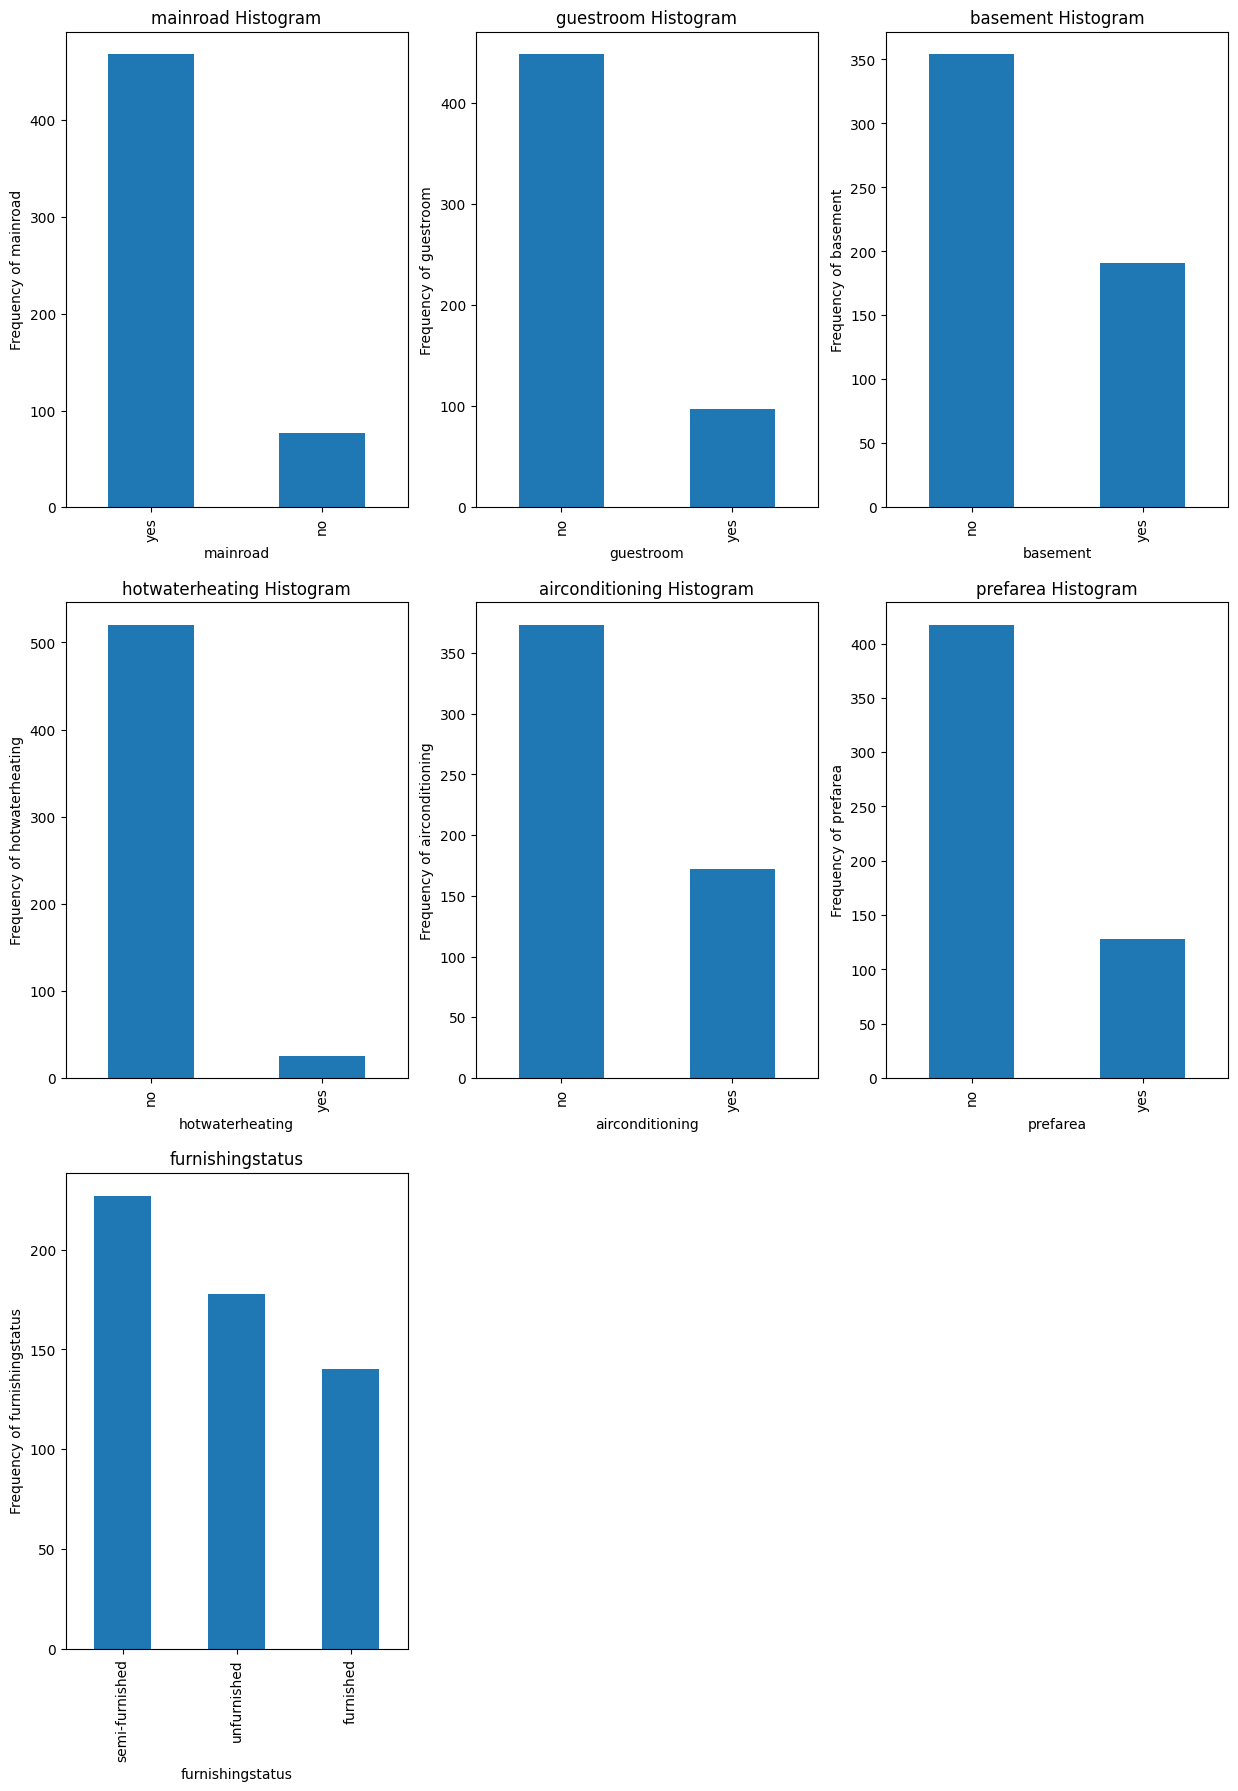

In [14]:
plt.figure(figsize=(15, 21))

plt.subplot(3, 3, 1)
plt1 = df['mainroad'].value_counts().plot(kind='bar')
plt.title('mainroad Histogram')
plt1.set(xlabel = 'mainroad', ylabel='Frequency of mainroad')

plt.subplot(3, 3, 2)
plt1 = df['guestroom'].value_counts().plot(kind='bar')
plt.title('guestroom Histogram')
plt1.set(xlabel = 'guestroom', ylabel='Frequency of guestroom')

plt.subplot(3, 3, 3)
plt1 = df['basement'].value_counts().plot(kind='bar')
plt.title('basement Histogram')
plt1.set(xlabel = 'basement', ylabel='Frequency of basement')

plt.subplot(3, 3, 4)
plt1 = df['hotwaterheating'].value_counts().plot(kind='bar')
plt.title('hotwaterheating Histogram')
plt1.set(xlabel = 'hotwaterheating', ylabel='Frequency of hotwaterheating')

plt.subplot(3, 3, 5)
plt1 = df['airconditioning'].value_counts().plot(kind='bar')
plt.title('airconditioning Histogram')
plt1.set(xlabel = 'airconditioning', ylabel='Frequency of airconditioning')

plt.subplot(3, 3, 6)
plt1 = df['prefarea'].value_counts().plot(kind='bar')
plt.title('prefarea Histogram')
plt1.set(xlabel = 'prefarea', ylabel='Frequency of prefarea')

plt.subplot(3, 3, 7)
plt1 = df['furnishingstatus'].value_counts().plot(kind='bar')
plt.title('furnishingstatus')
plt1.set(xlabel = 'furnishingstatus', ylabel='Frequency of furnishingstatus')

plt.show()

/tmp/ipykernel_21589/2549391427.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df.mainroad, y=df.price, palette=("cubehelix"))
/tmp/ipykernel_21589/2549391427.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df.guestroom, y=df.price, palette=("PuBuGn"))
/tmp/ipykernel_21589/2549391427.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df.basement, y=df.price, palette=("cubehelix"))
/tmp/ipykernel_21589/2549391427.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

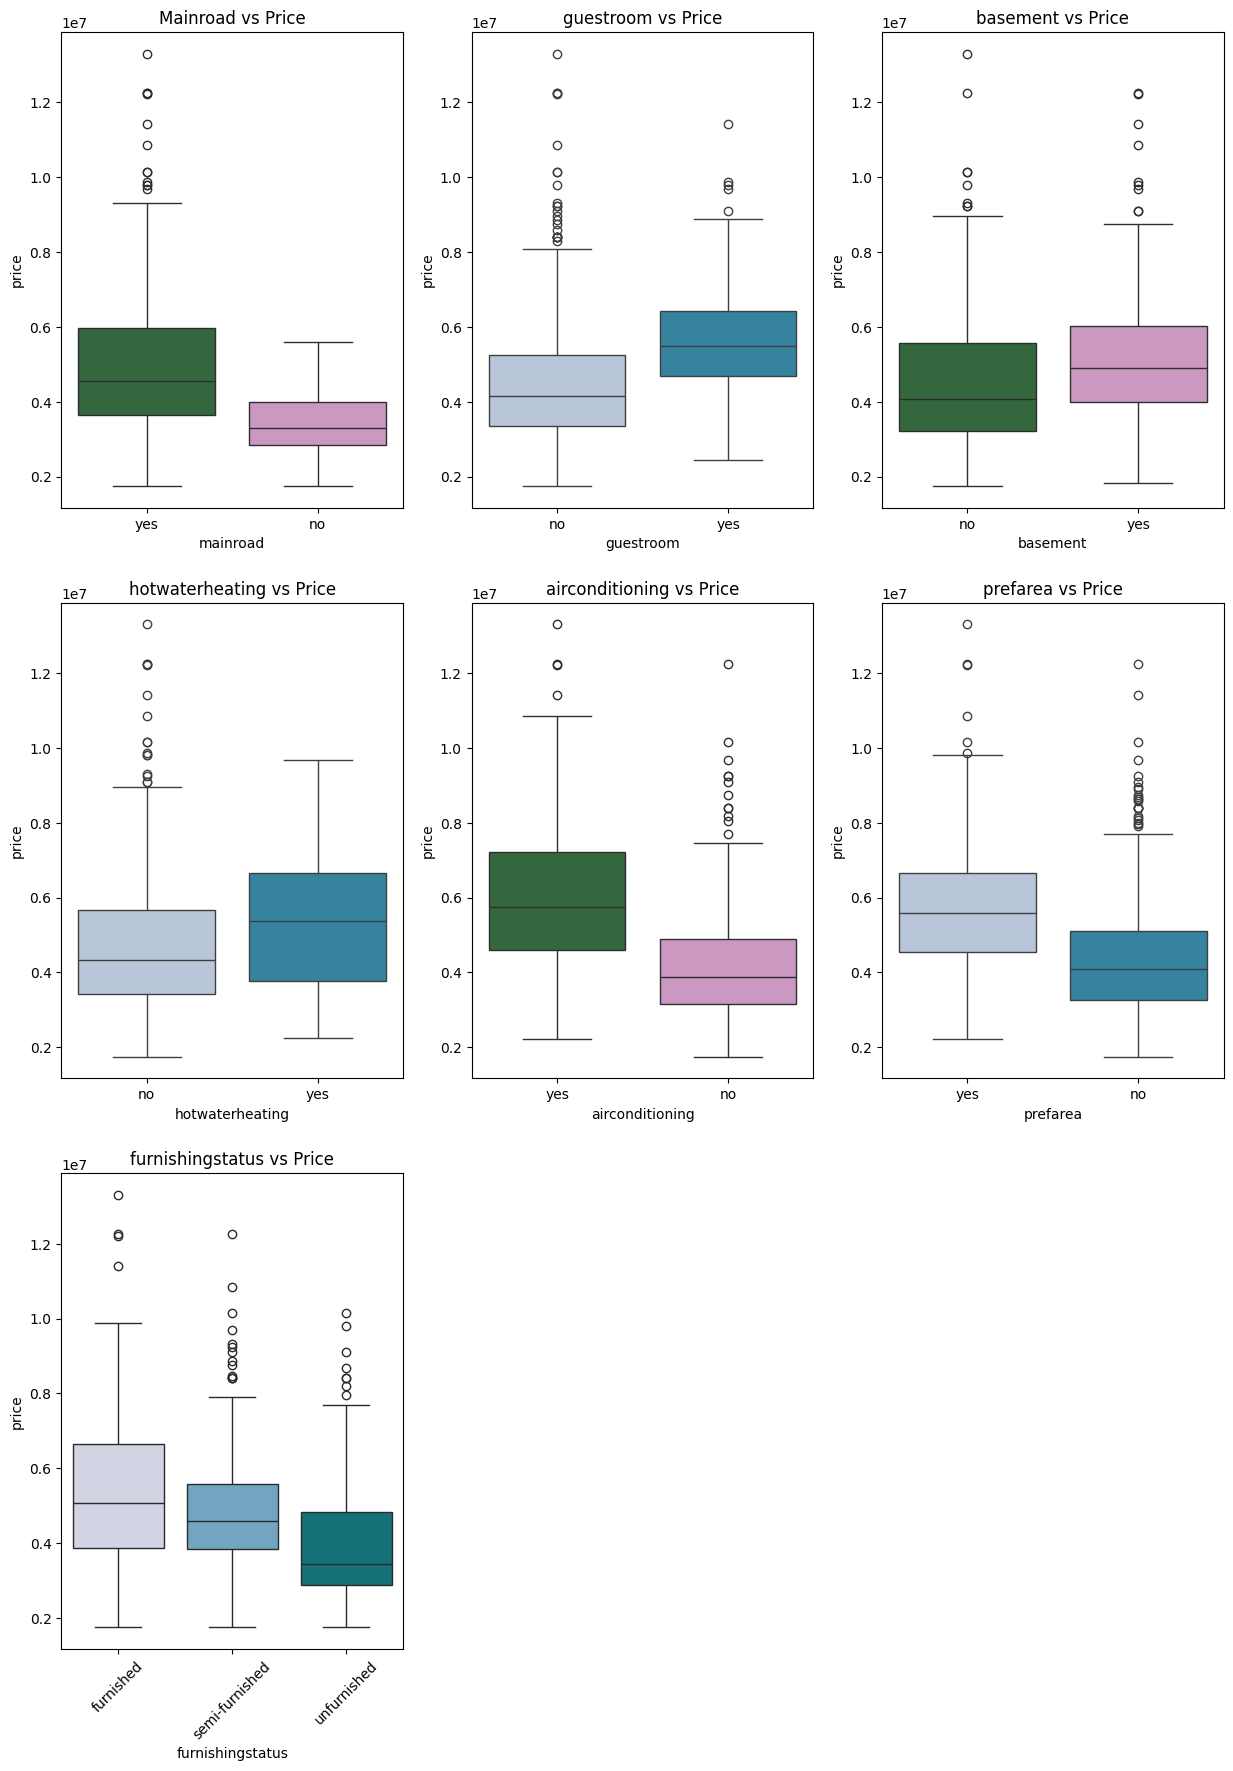

In [15]:
plt.figure(figsize=(15, 21))

plt.subplot(3, 3, 1)
plt.title('Mainroad vs Price')
sns.boxplot(x=df.mainroad, y=df.price, palette=("cubehelix"))

plt.subplot(3, 3, 2)
plt.title('guestroom vs Price')
sns.boxplot(x=df.guestroom, y=df.price, palette=("PuBuGn"))

plt.subplot(3, 3, 3)
plt.title('basement vs Price')
sns.boxplot(x=df.basement, y=df.price, palette=("cubehelix"))

plt.subplot(3, 3, 4)
plt.title('hotwaterheating vs Price')
sns.boxplot(x=df.hotwaterheating, y=df.price, palette=("PuBuGn"))

plt.subplot(3, 3, 5)
plt.title('airconditioning vs Price')
sns.boxplot(x=df.airconditioning, y=df.price, palette=("cubehelix"))

plt.subplot(3, 3, 6)
plt.title('prefarea vs Price')
sns.boxplot(x=df.prefarea, y=df.price, palette=("PuBuGn"))

plt.subplot(3, 3, 7)
plt.title('furnishingstatus vs Price')
sns.boxplot(x=df.furnishingstatus, y=df.price, palette=("PuBuGn"))
plt.xticks(rotation=45)

plt.show()

##### Visualising Numerical Features

In [16]:
numerical_features = [x for x in df.columns if df[x].dtype in ('int64','float64')]
print(numerical_features)

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


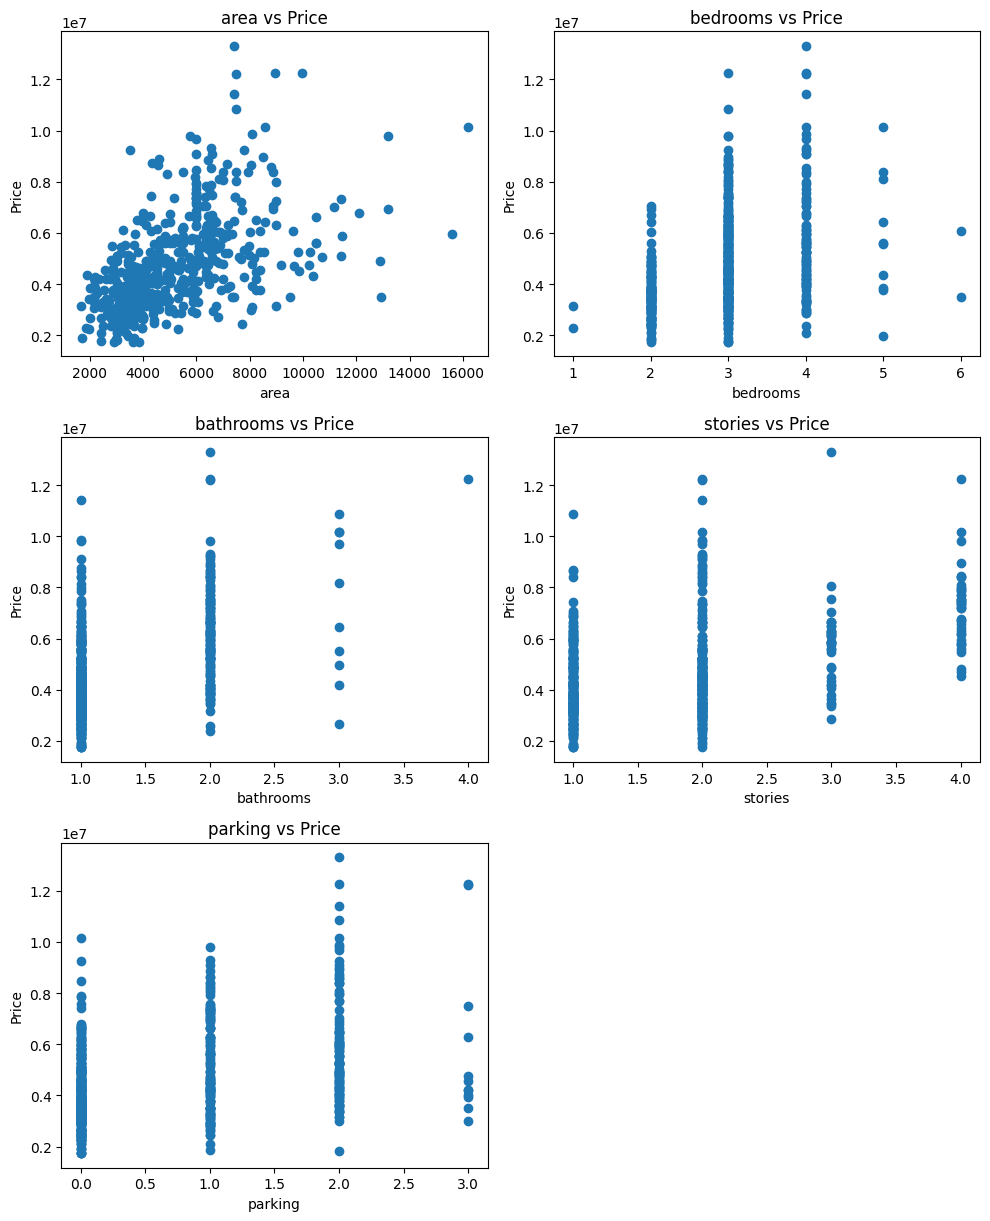

In [17]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('area', 1)
scatter('bedrooms', 2)
scatter('bathrooms', 3)
scatter('stories', 4)
scatter('parking',5)

plt.tight_layout()

##### Correlation Heatmap

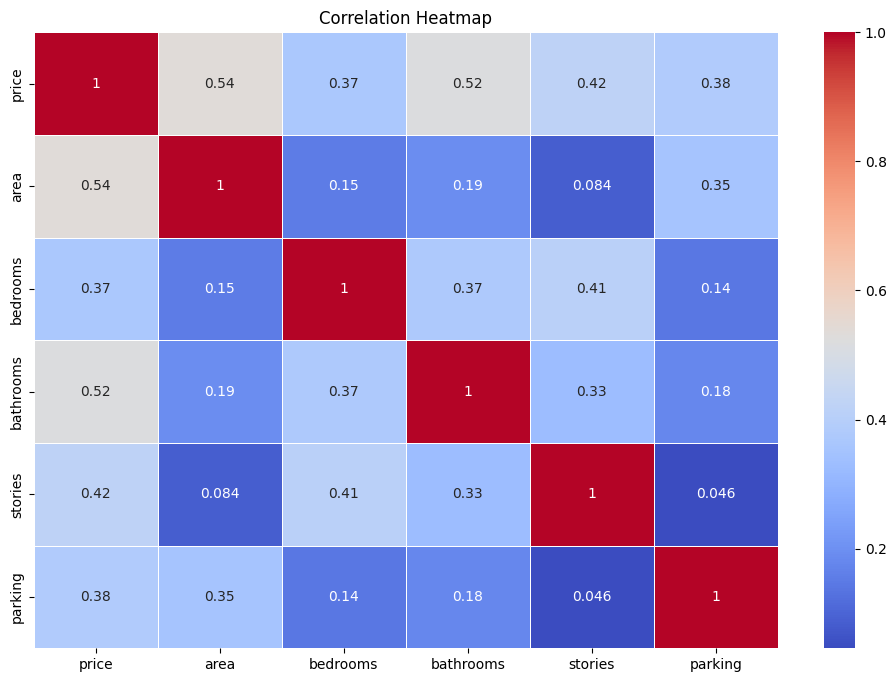

In [18]:
cor_matrix= df[numerical_features].corr()
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### Handle Categorical Features (Using One Hot Encoding)

In [19]:
categorical_features

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
# First split data to isolate test data
features = df.columns.drop("price")
target = "price"
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], train_size=0.85, test_size=0.15, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.85, test_size=0.15, random_state=1234)

In [22]:
categorical_features

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [23]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe.fit(X_train[categorical_features])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [24]:
encoded_array = ohe.transform(X_train[categorical_features])

In [25]:
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(categorical_features))

In [26]:
X_train.drop(columns=categorical_features, inplace=True)

In [27]:
X_train = pd.concat([X_train.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

In [28]:
X_train

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7085,3,1,1,2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,6500,3,2,3,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,6540,3,1,1,2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,3800,3,1,2,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,6450,3,2,1,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,3500,4,1,2,2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
389,3520,3,1,2,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
390,9500,3,1,2,3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
391,6000,2,1,1,1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [29]:
def apply_ohe(ohe: OneHotEncoder, X: pd.DataFrame, cat_features: list):
    encoded_array = ohe.transform(X[cat_features])
    encoded_df = pd.DataFrame(
        encoded_array, 
        columns=ohe.get_feature_names_out(cat_features)
    )
    X.drop(columns=cat_features, inplace=True)
    X = pd.concat(
        [
            X.reset_index(drop=True), 
            encoded_df.reset_index(drop=True)
        ], 
        axis=1
    )
    return X

In [30]:
X_test = apply_ohe(ohe, X_test.copy(), categorical_features)

In [31]:
X_test

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,3930,2,1,1,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,4320,3,1,2,2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,6000,4,3,2,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,11460,3,1,3,2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,4370,3,1,2,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,8250,3,1,1,2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
78,2000,2,1,2,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
79,6600,3,1,1,0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
80,6615,3,1,2,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [32]:
X_val = apply_ohe(ohe, X_val.copy(), categorical_features)

In [33]:
X_val

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,5500,3,2,1,2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,3620,2,1,1,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,3450,3,1,2,0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4500,3,2,3,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,6350,3,2,3,0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,3640,3,1,2,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
66,3180,2,1,1,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
67,6550,3,1,2,0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
68,4000,3,1,1,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [34]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_val_pred = lr_model.predict(X_val)

In [36]:
y_test_pred = lr_model.predict(X_test)

In [37]:
from sklearn.metrics import root_mean_squared_error

In [38]:
# Check validation score
root_mean_squared_error(y_val, y_val_pred)

1127115.441291579

In [39]:
# Check test score
root_mean_squared_error(y_test, y_test_pred)

1050857.7160987647

#### Lasso Model

In [40]:
from sklearn.linear_model import Lasso

In [41]:
la_model = Lasso()
la_model.fit(X_train, y_train)

Lasso()

In [42]:
y_val_pred = la_model.predict(X_val)
y_test_pred = la_model.predict(X_test)

In [43]:
# Check validation score
root_mean_squared_error(y_val, y_val_pred)

1127114.565359852

In [44]:
# Check test score
root_mean_squared_error(y_test, y_test_pred)

1050855.827239249